In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import librosa.display
import librosa

from glob import glob

import ffmpeg

import os

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

from scipy import interp

from itertools import cycle

import seaborn as sns

In [5]:
dinner_audio = pd.read_csv('../csv/dinner_audio.csv')
party_audio = pd.read_csv('../csv/party_audio.csv')
sleep_audio = pd.read_csv('../csv/sleep_audio.csv')
workout_audio = pd.read_csv('../csv/workout_audio.csv')

In [6]:
dinner_audio.dtypes

id         int64
name      object
mfcc     float64
scem     float64
scom     float64
srom     float64
sbwm     float64
tempo    float64
rmse     float64
dtype: object

In [9]:
dinner_audio.describe()

,id,mfcc,scem,scom,srom,sbwm,tempo,rmse
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,22.500000,-0.574876,1992.182027,21.993973,4321.360044,2332.447931,118.071405,3.556357
std,12.845233,2.932663,568.552242,1.145860,1324.702994,368.383738,25.248763,1.610806
min,1.000000,-6.427932,919.403232,19.623804,1623.715182,1326.876907,73.828125,0.965167
25%,11.750000,-2.210916,1645.818243,21.453497,3509.593361,2118.412693,94.848633,2.430418
50%,22.500000,-0.487498,1826.428550,22.002403,4078.208673,2346.598277,117.453835,3.408573
75%,33.250000,0.575637,2310.171902,22.546442,4923.693144,2513.300358,135.999178,4.290374
max,44.000000,6.805979,3433.067000,25.421477,7567.962571,3132.485393,172.265625,8.500946


In [7]:
dinner_audio['playlist'] = 'dinner'
party_audio['playlist'] = 'party'
sleep_audio['playlist'] = 'sleep'
workout_audio['playlist'] = 'workout'

In [8]:
frames = [dinner_audio, party_audio, sleep_audio, workout_audio]

result = pd.concat(frames)
result.drop(['id', 'name'], axis=1, inplace=True)
result.head()

,mfcc,scem,scom,srom,sbwm,tempo,rmse,playlist
0,2.182090,2008.227306,22.166286,4271.332505,2362.906658,129.199219,4.348369,dinner
1,-0.420979,1810.502120,22.819678,3800.143688,2217.648805,89.102909,3.749902,dinner
2,0.431973,1920.574739,20.068933,4231.882744,2553.858556,95.703125,4.450774,dinner
3,5.984499,1777.566251,21.454589,3898.109762,2247.092578,161.499023,6.248868,dinner
4,1.475227,2629.842184,21.647935,5873.931148,2734.929565,89.102909,3.963258,dinner


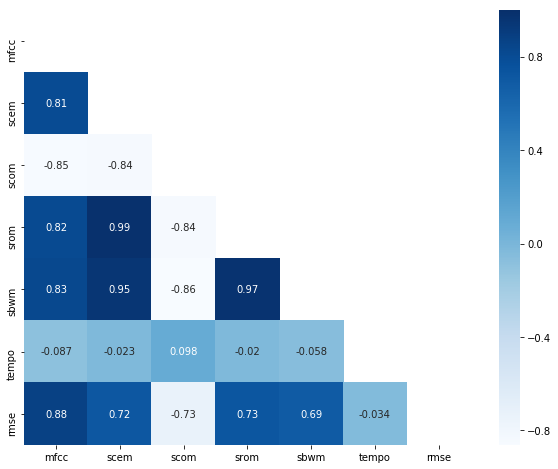

In [8]:
mask = np.zeros_like(result.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(result.corr(), mask=mask, annot=True, cmap="Blues")

In [9]:
result.isna().sum()

mfcc        0
scem        0
scom        0
srom        0
sbwm        0
tempo       0
rmse        0
playlist    0
dtype: int64

workout    49
dinner     44
sleep      44
party      37
Name: playlist, dtype: int64

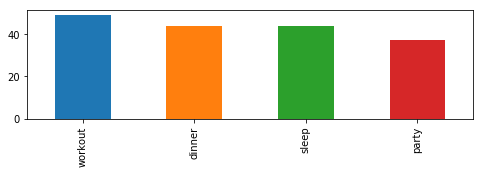

In [10]:
fig, ax = plt.subplots(figsize=(8,2))
ax = result.playlist.value_counts().plot.bar()

result.playlist.value_counts()

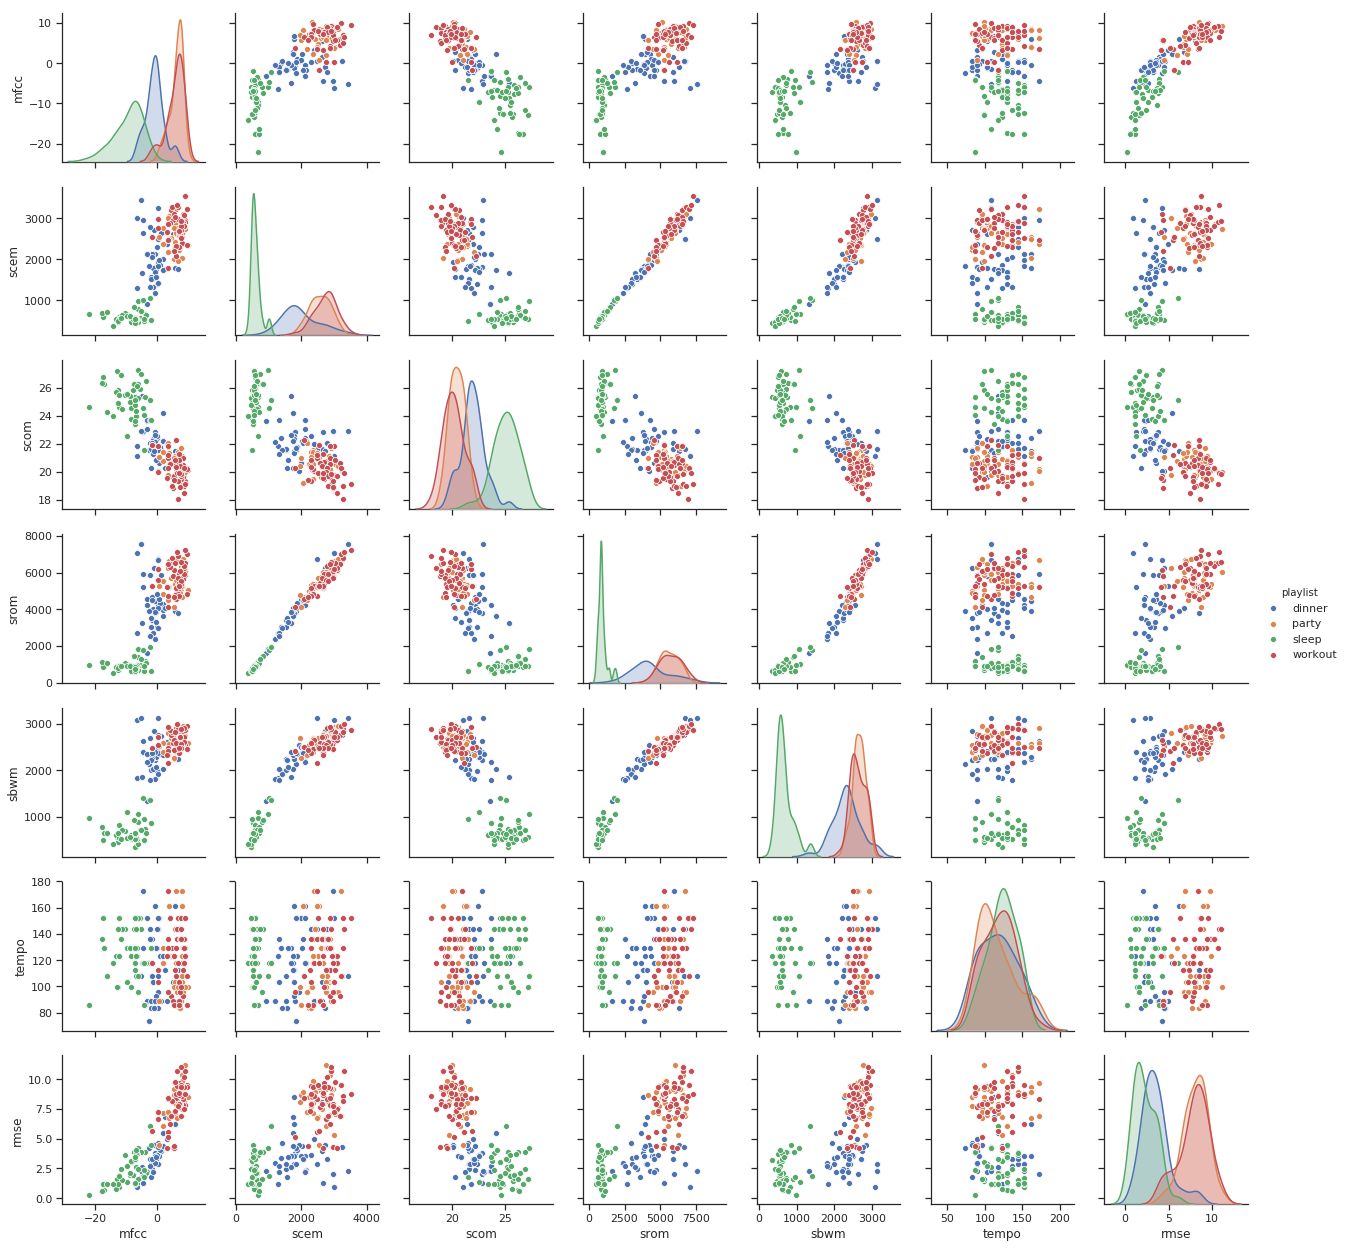

In [12]:
sns.set(style="ticks")

sns.pairplot(result, hue="playlist")